In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature=["Pregnancies","Glucose","Insulin","Age"]
X=data[feature]
y=data.Outcome

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)

In [6]:
logreg=LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

<Axes: xlabel='Glucose', ylabel='Outcome'>

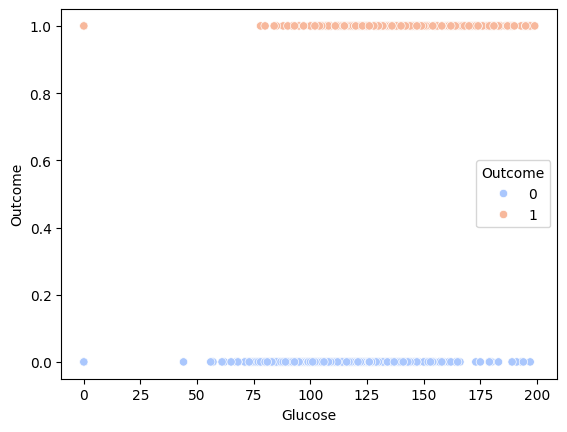

In [7]:
import seaborn as sns
sns.scatterplot(x='Glucose', y='Outcome', data=data, hue='Outcome', palette='coolwarm')

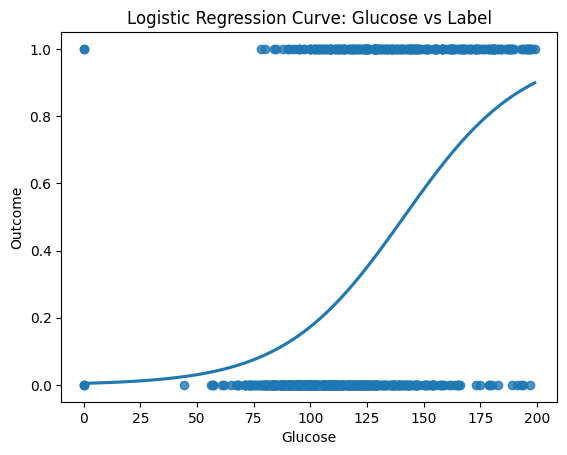

In [8]:
sns.regplot(x='Glucose', y='Outcome', data=data, logistic=True, ci=None)
plt.title('Logistic Regression Curve: Glucose vs Label')
plt.show()

In [9]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[116,   9],
       [ 31,  36]])

Text(0.5, 427.9555555555555, 'Predicted label')

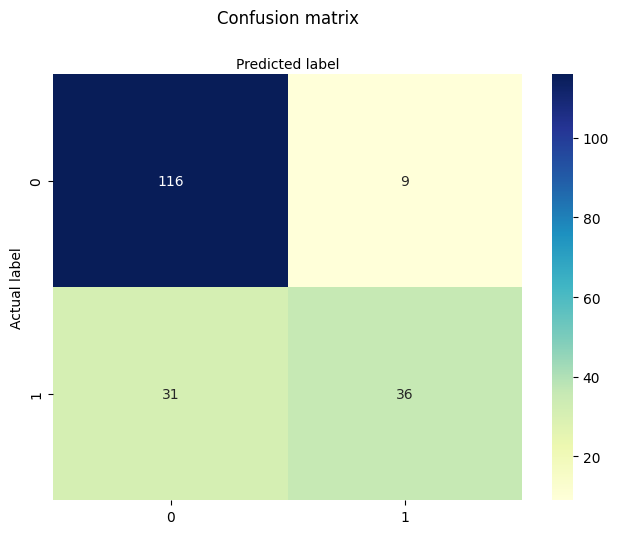

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

#Text(0.5,257.44,"Predicted label");

In [19]:
from sklearn.metrics import classification_report 
target_names=["without diabetes","With diabetes"]
print(classification_report(y_test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.93      0.85       125
   With diabetes       0.80      0.54      0.64        67

        accuracy                           0.79       192
       macro avg       0.79      0.73      0.75       192
    weighted avg       0.79      0.79      0.78       192



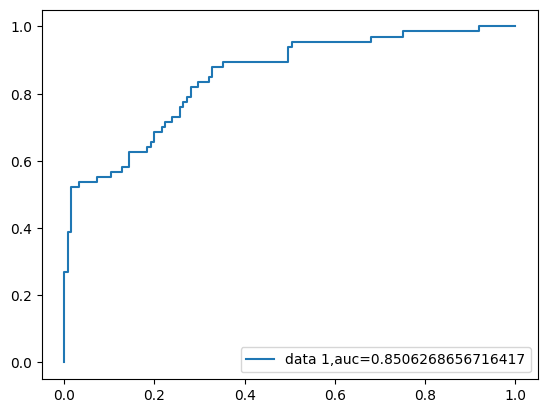

In [20]:
y_pred_proba=logreg.predict_log_proba(X_test)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()